In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
raw_data.columns.tolist()

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.shape

(20052, 680)

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

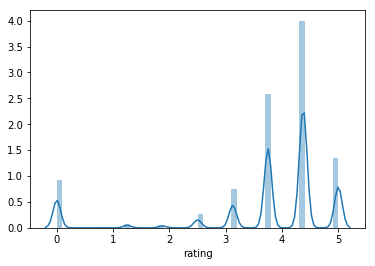

In [6]:
sns.distplot(raw_data.rating)
plt.show()

In [7]:
null = raw_data.isnull().sum() / len(raw_data)
null[null > 0]

calories    0.205316
protein     0.207560
fat         0.208608
sodium      0.205416
dtype: float64

In [8]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
svr.score(X, Y)

-0.003978314483867651

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Wow, this performed poorly. Now time to try this as a classification problem! Here we go!

## Classification

#### First, let's do some data cleaning!

In [15]:
df = raw_data

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [16]:
numeric_columns = df.select_dtypes(include=['float64'])

In [17]:
null = df.isnull().sum() / len(df)
null[null > 0]

calories   0.205
protein    0.208
fat        0.209
sodium     0.205
dtype: float64

In [18]:
drop_df = df.dropna()
drop_df.shape

(15864, 680)

In [19]:
numeric_columns = df.select_dtypes(include=['float64'])
numeric_columns.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.000,30.000,7.000,559.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,4.375,403.000,18.000,23.000,1439.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3.750,165.000,6.000,7.000,165.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,5.000,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,3.125,547.000,20.000,32.000,452.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [20]:
choosing = pd.DataFrame()

#setting up all numeric columns
choosing['columns'] = numeric_columns.columns

#create r^2 values column
r_values = []

for column in numeric_columns:
    corr, p_value = stats.pearsonr(drop_df['rating'], drop_df[column])
    r_values.append(abs(corr))


choosing['R-squared'] = r_values
choosing.head()

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,columns,R-squared
0,rating,1.000
1,calories,0.008
2,protein,0.014
3,fat,0.007
4,sodium,0.008


In [21]:
sorting = choosing.sort_values(by=['R-squared'], ascending=False)
sorting

,columns,R-squared
0,rating,1.000
191,drink,0.230
13,alcoholic,0.209
282,house & garden,0.200
240,gin,0.185
585,spirit,0.135
138,cocktail,0.131
62,bon appétit,0.129
55,bitters,0.128
139,cocktail party,0.126


In [22]:
#pull in the top 30 features
features = sorting['columns'][:31].tolist()
features.remove('rating')

In [37]:
from sklearn.svm import SVC


svm = SVC()

X = drop_df[features]
Y = drop_df['rating'].apply(lambda x: int(x))

svm.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
svm.score(X, Y)

0.43305597579425115

In [33]:
scores = cross_val_score(svm, X, Y, cv=5)

print(scores)
print('The average is {}'.format(scores.mean()))
print('The std. dev is {}'.format(scores.std()))

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

[0.42695214 0.43082257 0.43095839 0.42906683 0.43424787]
The average is 0.43040955969367634


Ok, this is definitely an improvement! Up to 43%. What happens if we use all of our numeric features (sorry title!)?

In [41]:
from sklearn.svm import SVC


svm = SVC()

X = drop_df.drop(columns=['rating', 'title'], axis=1)
Y = drop_df['rating'].apply(lambda x: int(x))

svm.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
svm.score(X, Y)

0.6347705496722138

In [ ]:
scores = cross_val_score(svm, X, Y, cv=5)

print(scores)
print('The average is {}'.format(scores.mean()))
print('The std. dev is {}'.format(scores.std()))

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Ok, so this performs much better but at the expense of taking MUCH longer. Good to know :)

## Back to Regression

In [28]:
svr = SVR()
X = drop_df[features]
Y = drop_df['rating']

svr.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
svr.score(X, Y)

0.015493903161171942

In [30]:
scores = cross_val_score(svr, X, Y, cv=5)

print(scores)
print('The average is {}'.format(scores.mean()))
print('The std. dev is {}'.format(scores.std()))

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

[-0.01348016  0.02597461  0.01803461  0.00066346  0.019502  ]
The average is 0.01013890417710952
The std. dev is 0.014480496097971723


So, this still performs much worse then our classification. This makes sense given the discrete nature of our target.